**Import Packages**

In [11]:
import pycaret
import pandas as pd
import numpy as np
import sqlalchemy
import mysql.connector

from pycaret import classification
from pycaret.classification import plot_model
from datetime import datetime
import importlib
import model.common

In [3]:
from static_data.load_static_data import *

In [5]:
df_player_positions

,Unnamed: 0,player_id,player_name,player_team_id,player_team_name,player_position
0,0,456167,A.J. Griffin,133,Oakland Athletics,Pitcher
1,0,134460,A.J. Hinch,133,Oakland Athletics,Catcher
2,0,640462,A.J. Puk,133,Oakland Athletics,Pitcher
3,0,605156,Aaron Brooks,133,Oakland Athletics,Pitcher
4,0,488811,Aaron Cunningham,133,Oakland Athletics,Outfielder
...,...,...,...,...,...,...
44728,0,451596,Yovani Gallardo,113,Cincinnati Reds,Pitcher
44729,0,435043,Zach Duke,113,Cincinnati Reds,Pitcher
44730,0,572227,Zach Vincej,113,Cincinnati Reds,Infielder
44731,0,446359,Zack Cozart,113,Cincinnati Reds,Infielder


**Load Data**

In [7]:
collect_data_Base_dir = 'collect_data'

In [8]:
df_game_matchup_total = pd.read_pickle(f'{collect_data_Base_dir}/df_game_matchup_total.pkl')
print(len(df_game_matchup_total))

320540


**Clean Data**

In [33]:
importlib.reload(model.common)

<module 'model.common' from '/home/junlim/projects/mlb-props/model/common.py'>

In [28]:
train_data = df_game_matchup_total[(df_game_matchup_total.game_date > "2012-04-01") & (df_game_matchup_total.game_date < "2022-12-01")][model.common.features]
test_data = df_game_matchup_total[(df_game_matchup_total.game_date > "2022-12-01")][model.common.features]

In [30]:
train_data.groupby('game_year').count()

,pitching_gamesPlayed,pitching_runs,pitching_strikeOuts,pitching_hits,pitching_id,batting_gamesPlayed,batting_runs,batting_strikeOuts,batting_hits,batting_rbi,batting_hit_recorded,batting_id,temp,game_venue,batting_name,pitching_name
game_year,,,,,,,,,,,,,,,,
2012,26156,26156,26156,26156,26156,26156,26156,26156,26156,26156,26156,26156,26156,26156,26156,26156
2013,25134,25134,25134,25134,25134,25134,25134,25134,25134,25134,25134,25134,25134,25134,25134,25134
2014,24424,24424,24424,24424,24424,24424,24424,24424,24424,24424,24424,24424,24424,24424,24424,24424
2015,23923,23923,23923,23923,23923,23923,23923,23923,23923,23923,23923,23923,23923,23923,23923,23923
2016,25313,25313,25313,25313,25313,25313,25313,25313,25313,25313,25313,25313,25313,25313,25313,25313
2017,26863,26863,26863,26863,26863,26863,26863,26863,26863,26863,26863,26863,26863,26863,26863,26863
2018,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711,26711,26696,26711,26711,26711
2019,28733,28733,28733,28733,28733,28733,28733,28733,28733,28733,28733,28733,28733,28733,28733,28733
2020,12567,12567,12567,12567,12567,12567,12567,12567,12567,12567,12567,12567,12567,12567,12567,12567


In [31]:
test_data.groupby('game_year').count()

,pitching_gamesPlayed,pitching_runs,pitching_strikeOuts,pitching_hits,pitching_id,batting_gamesPlayed,batting_runs,batting_strikeOuts,batting_hits,batting_rbi,batting_hit_recorded,batting_id,temp,game_venue,batting_name,pitching_name
game_year,,,,,,,,,,,,,,,,
2023,10618,10618,10618,10618,10618,10618,10618,10618,10618,10618,10618,10618,10618,10618,10618,10618


**Model Setup**

In [34]:
classification_setup = pycaret.classification.setup(
    data = train_data, target = "batting_hit_recorded", train_size = .70, use_gpu = False, 
    categorical_features = model.common.categorical_features, ignore_features = model.common.ignore_features)

,Description,Value
0,Session id,5948
1,Target,batting_hit_recorded
2,Target type,Binary
3,Original data shape,"(285367, 17)"
4,Transformed data shape,"(285367, 14)"
5,Transformed train set shape,"(199756, 14)"
6,Transformed test set shape,"(85611, 14)"
7,Ignore features,3
8,Numeric features,10
9,Categorical features,3


**Build/Train Model**

In [35]:
regressin_model = classification_setup.create_model("lr", probability_threshold = 0.50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6132,0.6189,0.8080,0.6253,0.7050,0.1693,0.1814
1,0.6162,0.6213,0.8092,0.6275,0.7069,0.1761,0.1884
2,0.6164,0.6237,0.8172,0.6262,0.7090,0.1744,0.1881
3,0.6199,0.6207,0.8222,0.6282,0.7122,0.1813,0.1961
4,0.6138,0.6213,0.8153,0.6244,0.7072,0.1686,0.1820
5,0.6159,0.6269,0.8143,0.6263,0.7080,0.1740,0.1872
6,0.6123,0.6192,0.8157,0.6230,0.7064,0.1647,0.1781
7,0.6182,0.6229,0.8224,0.6267,0.7113,0.1771,0.1919
8,0.6160,0.6241,0.8169,0.6259,0.7087,0.1734,0.1872


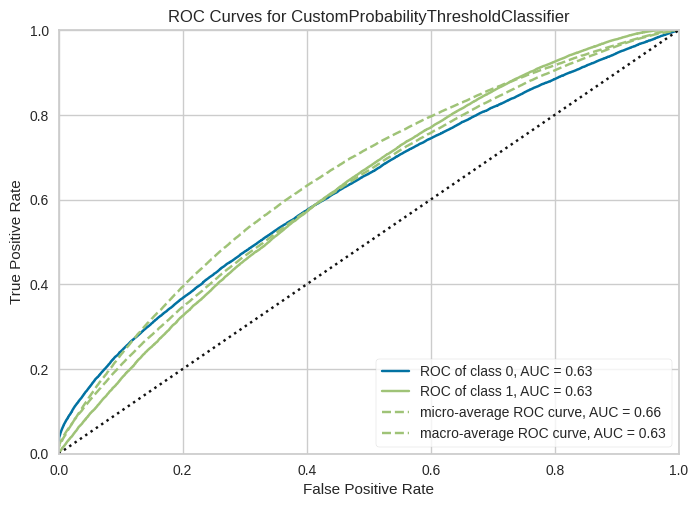

In [36]:
plot_model(regressin_model, plot = 'auc')

In [37]:
classification_setup.create_model("lr", probability_threshold = 0.75)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4513,0.6189,0.0621,0.7440,0.1146,0.0290,0.0778
1,0.4468,0.6213,0.0534,0.7210,0.0994,0.0223,0.0634
2,0.4469,0.6237,0.0572,0.7029,0.1057,0.0216,0.0585
3,0.4481,0.6207,0.0577,0.7186,0.1068,0.0238,0.0650
4,0.4479,0.6213,0.0570,0.7185,0.1056,0.0235,0.0646
5,0.4482,0.6269,0.0581,0.7178,0.1075,0.0239,0.0650
6,0.4487,0.6192,0.0575,0.7284,0.1066,0.0250,0.0687
7,0.4471,0.6229,0.0527,0.7306,0.0983,0.0231,0.0665
8,0.4489,0.6241,0.0556,0.7436,0.1034,0.0259,0.0733


CustomProbabilityThresholdClassifier(C=1.0, class_weight=None,
                                     classifier=LogisticRegression(C=1.0,
                                                                   class_weight=None,
                                                                   dual=False,
                                                                   fit_intercept=True,
                                                                   intercept_scaling=1,
                                                                   l1_ratio=None,
                                                                   max_iter=1000,
                                                                   multi_class='auto',
                                                                   n_jobs=None,
                                                                   penalty='l2',
                                                                   random_state=5948,
                                                                   solver='lbfgs',
                                                                   tol=0.0001,
                                                                   verbose=0,
                                                                   warm_start=False),
                                     dual=False, fit_intercept=True,
                                     intercept_scaling=1, l1_ratio=None,
                                     max_iter=1000, multi_class='auto',
                                     n_jobs=None, penalty='l2',
                                     probability_threshold=0.75,
                                     random_state=5948, solver='lbfgs',
                                     tol=0.0001, verbose=0, warm_start=False)

**Finalize & Save Model**

In [38]:
# train over the whole dataset without validation split
regressin_model_finalized = pycaret.classification.finalize_model(regressin_model)

In [41]:
#hit_save_to_file_string = f"{datetime.today().strftime('%Y%m%d')}_" + "batter_hit_lr_model"
model_base_dir = 'model'
model_file_name = f"{model_base_dir}/batter_hit_lr_model"
pycaret.classification.save_model(regressin_model_finalized, model_file_name)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pitching_gamesPlayed',
                                              'pitching_runs',
                                              'pitching_strikeOuts',
                                              'pitching_hits',
                                              'batting_gamesPlayed',
                                              'batting_runs',
                                              'batting_strikeOuts',
                                              'batting_hits', 'batting_rbi',
                                              'temp'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill...
                                  